     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswisseph: filename=pyswisseph-2.10.3.2-cp312-cp312-linux_x86_64.whl size=1060517 sha256=a45b6c7a84046e89ab3bdb8160b60e2e9ce54fb82c418cab6e9f9c7035ab0dcd
  Stored in directory: /root/.cache/pip/wheels/53/e8/4c/35599127e13d658763aef9a1abdf34ba927411ee29b8a06bb4
Successfully built pyswisseph
=== CORRECT North Indian Kundali Chart Generator ===

Traditional authentic format

Enter date of birth (YYYY-MM-DD): 2006-01-23
Enter time of birth (HH:MM:SS) 24hr format: 16:40:46
Enter latitude of birth place (decimal degrees, +ve N, -ve S): 22.5744
Enter longitude of birth place (decimal degrees, +ve E, -ve W): 88.3629

NORTH INDIAN KUNDALI - CORRECT FORMAT
Ascendant: Libra 10.54°

House Layout (North Indian Tradition):
1st House (लग्न) - Self, Personality : Ke
2nd House (धन) - Wealth, Speech     : Mo, Ju
3rd House (भावंड) - Siblings, Courage : Pl
4th House 

/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511359692.py:152: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

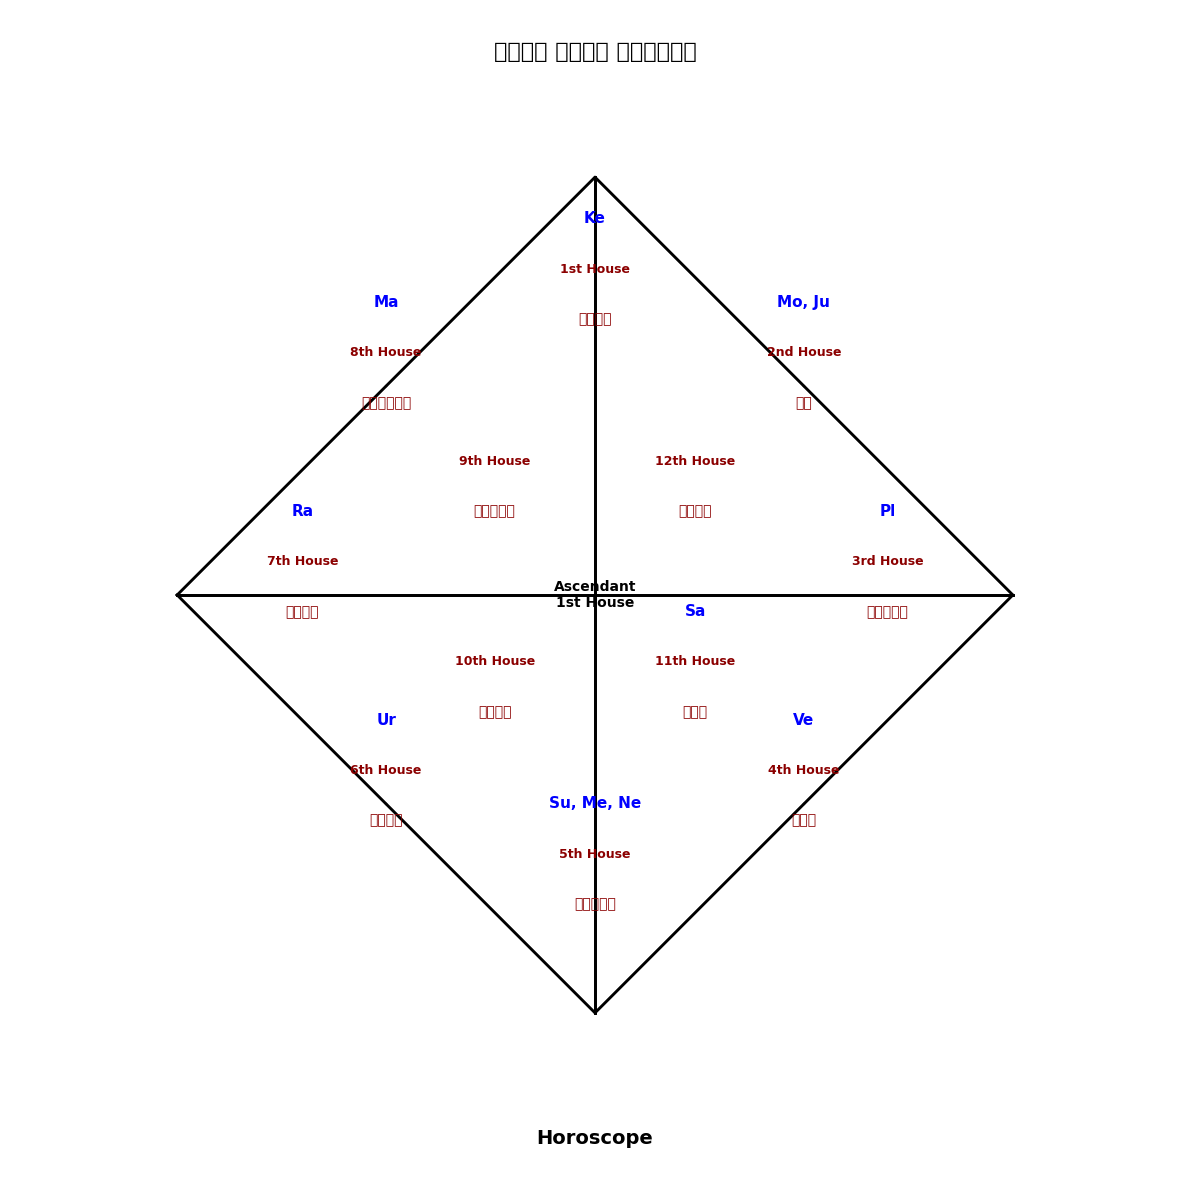


✓ Authentic North Indian Kundali generated!
✓ Houses follow traditional clockwise sequence
✓ Ascendant correctly positioned at top


In [ ]:
!pip install pyswisseph matplotlib

import swisseph as swe
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime
import numpy as np

# Set path for ephemeris files
swe.set_ephe_path('/usr/share/ephe')

# Set sidereal mode to Lahiri ayanamsa for Vedic astrology
swe.set_sid_mode(swe.SIDM_LAHIRI)

def get_julian_day(year, month, day, hour=0, minute=0, second=0):
    ut = hour + minute / 60.0 + second / 3600.0
    return swe.julday(year, month, day, ut)

def calculate_planets(jd_ut):
    planets = [
        swe.SUN, swe.MOON, swe.MERCURY, swe.VENUS, swe.MARS,
        swe.JUPITER, swe.SATURN, swe.URANUS, swe.NEPTUNE, swe.PLUTO,
        swe.MEAN_NODE
    ]
    positions = {}
    planet_names = {
        swe.SUN: 'Su', swe.MOON: 'Mo', swe.MERCURY: 'Me',
        swe.VENUS: 'Ve', swe.MARS: 'Ma', swe.JUPITER: 'Ju',
        swe.SATURN: 'Sa', swe.URANUS: 'Ur', swe.NEPTUNE: 'Ne',
        swe.PLUTO: 'Pl', swe.MEAN_NODE: 'Ra'
    }

    for planet in planets:
        pos, ret = swe.calc_ut(jd_ut, planet)
        if planet == swe.MEAN_NODE:
            positions['Ra'] = pos[0]
            ketu_pos = (pos[0] + 180) % 360
            positions['Ke'] = ketu_pos
        else:
            positions[planet_names[planet]] = pos[0]

    return positions

def calculate_houses(jd_ut, lat, lon):
    cusps, ascmc = swe.houses(jd_ut, lat, lon, b'P')
    return cusps, ascmc

def get_sign_number(longitude):
    return int((longitude % 360) // 30)

def get_planets_in_houses(planet_positions, ascendant):
    asc_sign = get_sign_number(ascendant)
    houses = [[] for _ in range(12)]

    for planet, longitude in planet_positions.items():
        planet_sign = get_sign_number(longitude)
        # Calculate house number based on sign relative to ascendant sign
        house_num = (planet_sign - asc_sign) % 12
        houses[house_num].append(planet)

    return houses

def draw_correct_north_indian_chart(houses, ascendant):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.set_xlim(-7, 7)
    ax.set_ylim(-7, 7)
    ax.set_aspect('equal')
    ax.axis('off')

    # Title
    ax.text(0, 6.5, 'जन्म लग्न कुंडली', ha='center', va='center',
            fontsize=16, fontweight='bold', color='black')

    # Draw the diamond structure - CORRECT North Indian format
    size = 5

    # Main diamond outline
    diamond = np.array([[-size, 0], [0, size], [size, 0], [0, -size], [-size, 0]])
    ax.plot(diamond[:, 0], diamond[:, 1], 'k-', linewidth=2)

    # Internal lines creating 12 houses in traditional North Indian pattern
    # Vertical and horizontal center lines
    ax.plot([0, 0], [-size, size], 'k-', linewidth=2)
    ax.plot([-size, size], [0, 0], 'k-', linewidth=2)

    # Diagonal lines from center to corners
    ax.plot([0, -size], [0, 0], 'k-', linewidth=2)
    ax.plot([0, size], [0, 0], 'k-', linewidth=2)
    ax.plot([0, 0], [0, size], 'k-', linewidth=2)
    ax.plot([0, 0], [0, -size], 'k-', linewidth=2)

    # Additional lines to create proper 12-house division
    # Top triangle divisions
    ax.plot([-size/2, 0], [size/2, size], 'k-', linewidth=1.5)
    ax.plot([size/2, 0], [size/2, size], 'k-', linewidth=1.5)

    # Right triangle divisions
    ax.plot([size/2, size], [size/2, 0], 'k-', linewidth=1.5)
    ax.plot([size/2, size], [-size/2, 0], 'k-', linewidth=1.5)

    # Bottom triangle divisions
    ax.plot([size/2, 0], [-size/2, -size], 'k-', linewidth=1.5)
    ax.plot([-size/2, 0], [-size/2, -size], 'k-', linewidth=1.5)

    # Left triangle divisions
    ax.plot([-size/2, -size], [size/2, 0], 'k-', linewidth=1.5)
    ax.plot([-size/2, -size], [-size/2, 0], 'k-', linewidth=1.5)

    # CORRECT North Indian house positions and labels
    # This is the authentic traditional layout
    house_positions = {
        # House: (x, y, english_label, sanskrit_label)
        1: (0, 3.5, "1st House", "लग्न"),           # TOP - Ascendant
        2: (2.5, 2.5, "2nd House", "धन"),          # TOP-RIGHT
        3: (3.5, 0, "3rd House", "भावंड"),         # RIGHT
        4: (2.5, -2.5, "4th House", "सुख"),        # BOTTOM-RIGHT
        5: (0, -3.5, "5th House", "संतति"),        # BOTTOM
        6: (-2.5, -2.5, "6th House", "रिपु"),      # BOTTOM-LEFT
        7: (-3.5, 0, "7th House", "जाया"),         # LEFT
        8: (-2.5, 2.5, "8th House", "मृत्यु"),      # TOP-LEFT
        9: (-1.2, 1.2, "9th House", "भाग्य"),      # TOP-LEFT inner
        10: (-1.2, -1.2, "10th House", "कर्म"),    # BOTTOM-LEFT inner
        11: (1.2, -1.2, "11th House", "लाभ"),      # BOTTOM-RIGHT inner
        12: (1.2, 1.2, "12th House", "व्यय")       # TOP-RIGHT inner
    }

    # Draw houses with correct positioning
    for house_num, (x, y, eng_label, sanskrit_label) in house_positions.items():
        # House label
        ax.text(x, y + 0.4, eng_label, ha='center', va='center',
                fontsize=9, fontweight='bold', color='darkred')

        # Sanskrit label
        ax.text(x, y - 0.2, sanskrit_label, ha='center', va='center',
                fontsize=10, fontweight='bold', color='darkred')

        # Planets in this house
        planets_in_house = houses[house_num - 1]
        if planets_in_house:
            planet_text = ', '.join(planets_in_house)
            ax.text(x, y + 1.0, planet_text, ha='center', va='center',
                    fontsize=11, fontweight='bold', color='blue')

    # Center text
    ax.text(0, 0, 'Ascendant\n1st House', ha='center', va='center',
            fontsize=10, fontweight='bold')

    # Bottom label
    ax.text(0, -6.5, 'Horoscope', ha='center', va='center',
            fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

def generate_correct_kundali():
    print("=== CORRECT North Indian Kundali Chart Generator ===\n")
    print("Traditional authentic format\n")

    # Input
    dob = input("Enter date of birth (YYYY-MM-DD): ")
    tob = input("Enter time of birth (HH:MM:SS) 24hr format: ")
    latitude = float(input("Enter latitude of birth place (decimal degrees, +ve N, -ve S): "))
    longitude = float(input("Enter longitude of birth place (decimal degrees, +ve E, -ve W): "))

    try:
        year, month, day = [int(x) for x in dob.split('-')]
        hour, minute, second = [int(x) for x in tob.split(':')]
    except ValueError:
        print("Invalid format!")
        return

    jd_ut = get_julian_day(year, month, day, hour, minute, second)

    # Calculations
    planet_positions = calculate_planets(jd_ut)
    cusps, ascmc = calculate_houses(jd_ut, latitude, longitude)
    ascendant = ascmc[0]
    houses = get_planets_in_houses(planet_positions, ascendant)

    # Display results
    print(f"\n{'='*60}")
    print("NORTH INDIAN KUNDALI - CORRECT FORMAT")
    print(f"{'='*60}")

    signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo',
             'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']

    asc_sign = get_sign_number(ascendant)
    print(f"Ascendant: {signs[asc_sign]} {ascendant % 30:.2f}°")

    print(f"\nHouse Layout (North Indian Tradition):")
    print(f"{'='*60}")
    house_names = [
        "1st House (लग्न) - Self, Personality",
        "2nd House (धन) - Wealth, Speech",
        "3rd House (भावंड) - Siblings, Courage",
        "4th House (सुख) - Home, Mother",
        "5th House (संतति) - Children, Education",
        "6th House (रिपु) - Health, Enemies",
        "7th House (जाया) - Marriage, Partnership",
        "8th House (मृत्यु) - Longevity, Hidden",
        "9th House (भाग्य) - Fortune, Father",
        "10th House (कर्म) - Career, Status",
        "11th House (लाभ) - Gains, Friends",
        "12th House (व्यय) - Loss, Spirituality"
    ]

    for i, (house_name, planets_list) in enumerate(zip(house_names, houses)):
        planets = ', '.join(planets_list) if planets_list else "Empty"
        print(f"{house_name:<35} : {planets}")

    print(f"\n{'='*60}")
    print("Generating CORRECT Traditional Chart...")

    # Generate correct chart
    draw_correct_north_indian_chart(houses, ascendant)

    print("\n✓ Authentic North Indian Kundali generated!")
    print("✓ Houses follow traditional clockwise sequence")
    print("✓ Ascendant correctly positioned at top")

if __name__ == "__main__":
    generate_correct_kundali()